In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.draw import polygon as sk_poly

In [2]:
def get_index(l, x):
    if len(l)==1:
        return 0 if x<=l[0] else 1
    s_point = len(l)//2
    l0, l1 = l[:s_point], l[s_point:]
    if x<=l0[-1]:
        return get_index(l0, x)
    else:
        return len(l0)+get_index(l1, x)

def fibo(n=None, max_num=None, min_num=None):
    if n is None and max_num is None:
        raise ValueError("One of n and max_num should be given.")
    res = [1,1]
    if n is not None:
        for i in range(n-2):
            res.append(res[-1]+res[-2])
    else:
        while res[-1]<max_num:
            res.append(res[-1]+res[-2])
        res = res[:-1]
    if min_num is not None:
        res = res[get_index(res, min_num):]
    return res

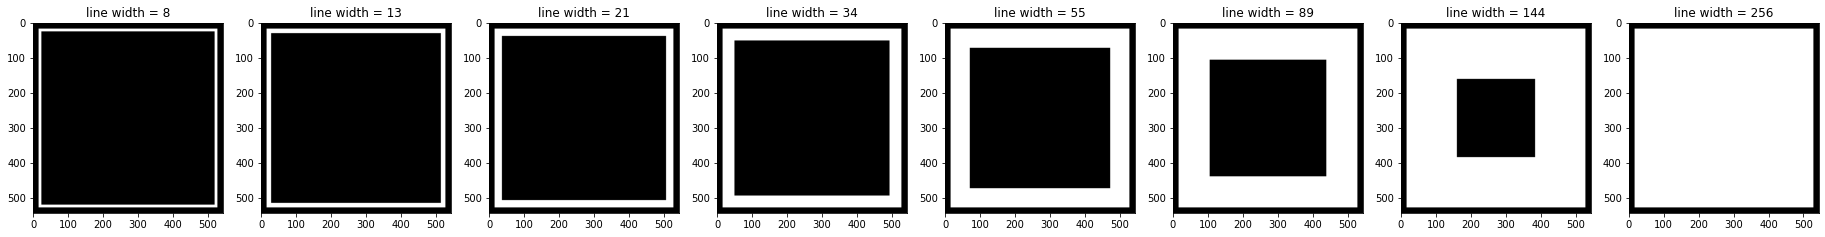

In [3]:
square = np.zeros([512,512])
folder = "squares"

ws = np.array(fibo(max_num=192, min_num=8)+[256])
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    pattern = square.copy()
    pattern[:w] = 1
    pattern[-w:] = 1
    pattern[:,:w] = 1
    pattern[:,-w:] = 1
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

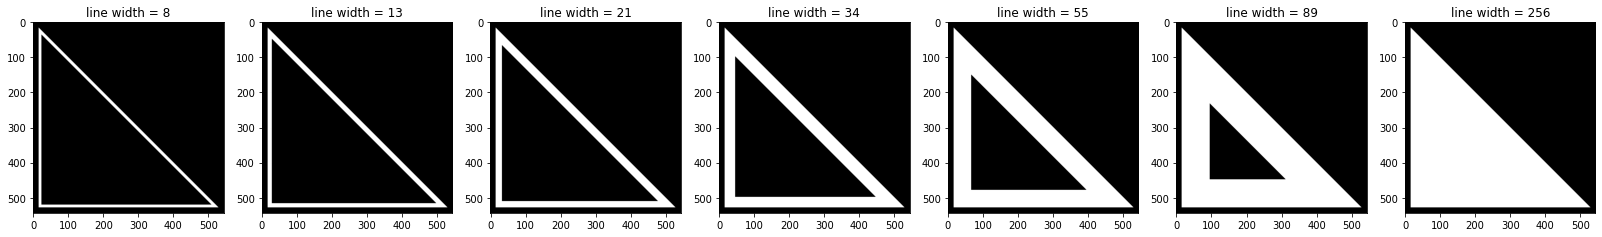

In [4]:
coords = np.array(np.meshgrid(np.arange(512), np.arange(512), indexing="ij")).transpose([1,2,0])
folder = "triangles_45"

ws = np.array(fibo(max_num=128, min_num=8)+[256])
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    w_real = int(np.round(w / 2.414 * 2))
    w_bias = int(np.round(w_real / 2.414 * 0.207))
    pattern = (coords[...,0]>=coords[...,1]).astype(float)
    pattern_ = cv2.copyMakeBorder(pattern,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    sub = cv2.erode(pattern_, np.ones((3,3),np.uint8), iterations = w_real)[1:-1,1:-1]
    sub = np.roll(sub, - w_bias, axis=0)
    sub = np.roll(sub, w_bias, axis=1)
    pattern = pattern - sub
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

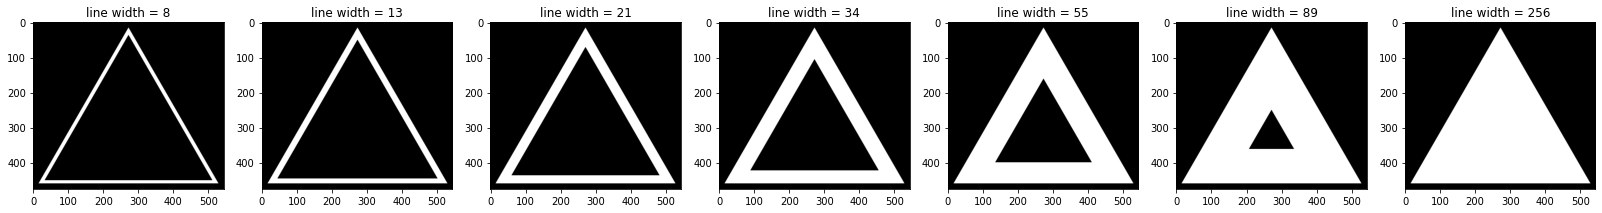

In [5]:
coords = np.array(np.meshgrid(np.arange(512), np.arange(512), indexing="ij")).transpose([1,2,0])
folder = "triangles_equi"

ws = np.array(fibo(max_num=128, min_num=8)+[256])
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    w_real = int(np.round(w / 2.732 * 2))
    w_bias = int(np.round(w_real / 2.732 * 0.366))
    pattern = (coords[...,0]>=coords[...,1]).astype(float)
    pattern = np.concatenate([pattern[:,::-1], pattern], axis=1)
    pattern = cv2.resize(pattern, (512, int(round(512 / 2 * 1.732))))
    pattern_ = cv2.copyMakeBorder(pattern,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
    
    sub = cv2.erode(pattern_, np.ones((3,3),np.uint8), iterations = w)[1:-1,1:-1]
    sub = np.roll(sub, - w_bias, axis=0)
    pattern = pattern - sub
    
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

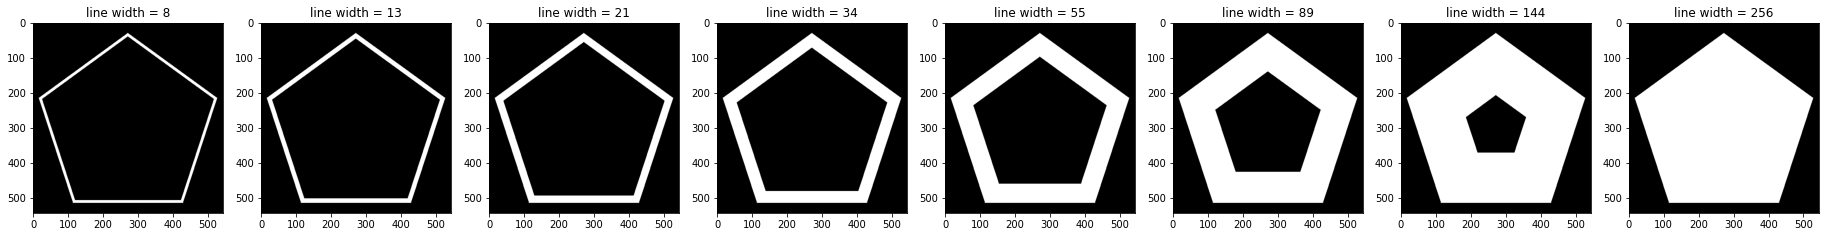

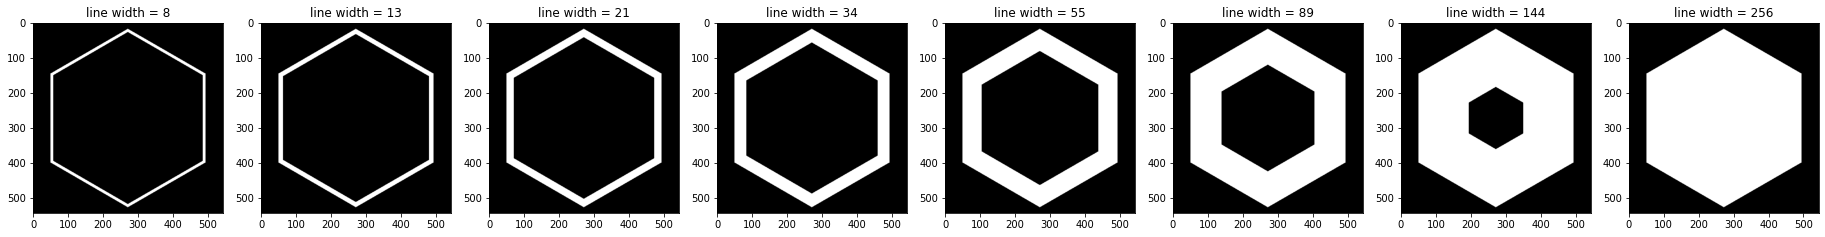

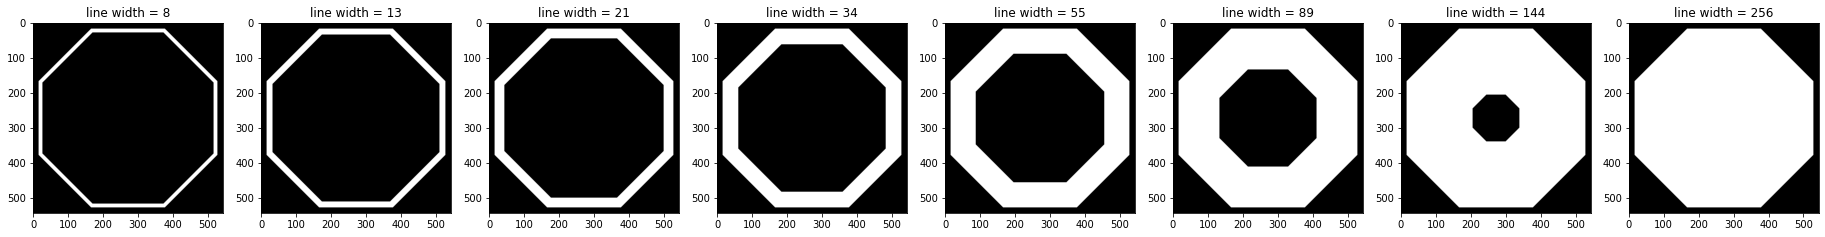

In [6]:
center = np.array([1,1])
folder = "polygons"

for n, is_flat_top in [(5, False), (6, False), (8, True)]:
    angles = [360 / n * i + (180 / n if is_flat_top else 0) for i in range(n)]
    pts = [center + np.array([-np.sin(a/180*np.pi), np.cos(a/180*np.pi)]) for a in angles]
    # pt0 = np.array([0,1])
    # pt1 = center + np.array([-np.sin(18/180*np.pi), -np.cos(18/180*np.pi)])
    # pt2 = center + np.array([np.sin(54/180*np.pi), -np.cos(54/180*np.pi)])
    # pt3 = center + np.array([np.sin(54/180*np.pi), np.cos(54/180*np.pi)])
    # pt4 = center + np.array([-np.sin(18/180*np.pi), np.cos(18/180*np.pi)])
    vertices = np.array([center] + pts)
    vertices[:,0] -= np.min(vertices[:,0])
    vertices[:,1] -= np.min(vertices[:,1])
    vertices /= np.max(vertices)
    vertices = vertices * 511

    ws = np.array(fibo(max_num=192, min_num=8)+[256])
    plt.figure(figsize=(4*len(ws),4))
    for i_w, w in enumerate(ws):
        v = np.round(vertices).astype(int)
        pattern = np.zeros((np.max(v[:,0])+1, np.max(v[:,1])+1))
        rr, cc = sk_poly(v[1:,0], v[1:,1], pattern.shape)
        pattern[rr,cc] = 1

        sub_v = vertices[1:] - vertices[:1]
        sub_v /= np.linalg.norm(sub_v, axis=1)[:,None]
        if w<256:
            w_ = w / np.cos((2 if is_flat_top else 1) / n *np.pi)
            sub = np.zeros((np.max(v[:,0])+1, np.max(v[:,1])+1))
            rr, cc = sk_poly(v[1:,0] - sub_v[:,0] * w_, v[1:,1] - sub_v[:,1] * w_, sub.shape)
            sub[rr,cc] = 1
            pattern = pattern - sub
        pattern = pattern.T[::-1]
    
        b = [512-pattern.shape[0], 512-pattern.shape[1]]
        b = [b[0]//2, b[0]-b[0]//2, b[1]//2, b[1]-b[1]//2]
        pattern = cv2.copyMakeBorder(pattern,b[0],b[1],b[2],b[3],cv2.BORDER_CONSTANT,value=0)

        plt.subplot(1,len(ws),i_w+1)
        plt.gca().set_title(f"line width = {w}")
        plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
        os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
        cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-n{n}-w{w}.png', np.array([
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
        ]).transpose([1,2,0]))
        cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-n{n}-w{w}.png', np.array([
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
        ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

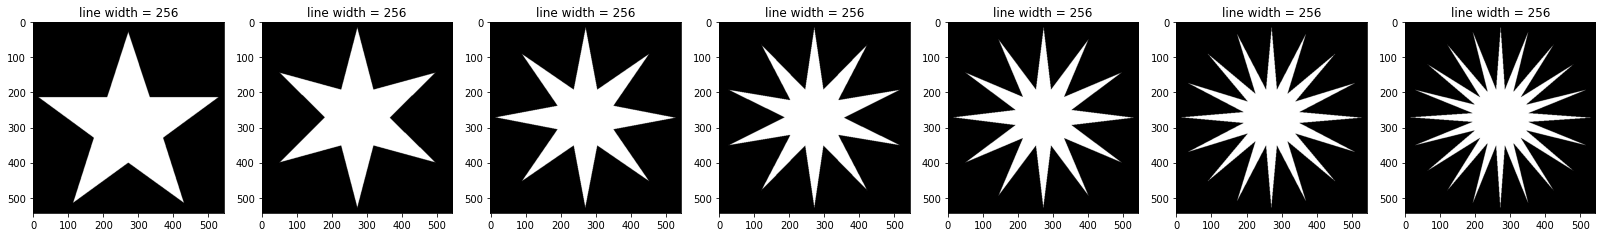

In [7]:
center = np.array([1,1])
folder = "stars0"

plt.figure(figsize=(4*7,4))
for i_n, (n, is_flat_top) in enumerate([
    (5, False), (6, False), (8, False), (10, False), (12, False), (16, False), (20, False)
]):
    rate = 1 / 3.2 / np.cos(1 / n * np.pi)
    angles = [180 / n * i + (90 / n if is_flat_top else 0) for i in range(n * 2)]
    pts = [center + np.array([
        -np.sin(a/180*np.pi), np.cos(a/180*np.pi)
    ]) * (1 if ia%2==0 else rate) for ia, a in enumerate(angles)]
    # pt0 = np.array([0,1])
    # pt1 = center + np.array([-np.sin(18/180*np.pi), -np.cos(18/180*np.pi)])
    # pt2 = center + np.array([np.sin(54/180*np.pi), -np.cos(54/180*np.pi)])
    # pt3 = center + np.array([np.sin(54/180*np.pi), np.cos(54/180*np.pi)])
    # pt4 = center + np.array([-np.sin(18/180*np.pi), np.cos(18/180*np.pi)])
    vertices = np.array([center] + pts)
    vertices[:,0] -= np.min(vertices[:,0])
    vertices[:,1] -= np.min(vertices[:,1])
    vertices /= np.max(vertices)
    vertices = vertices * 511

    v = np.round(vertices).astype(int)
    pattern = np.zeros((np.max(v[:,0])+1, np.max(v[:,1])+1))
    rr, cc = sk_poly(v[1:,0], v[1:,1], pattern.shape)
    pattern[rr,cc] = 1
    pattern = pattern.T[::-1]
    
    b = [512-pattern.shape[0], 512-pattern.shape[1]]
    b = [b[0]//2, b[0]-b[0]//2, b[1]//2, b[1]-b[1]//2]
    pattern = cv2.copyMakeBorder(pattern,b[0],b[1],b[2],b[3],cv2.BORDER_CONSTANT,value=0)

    plt.subplot(1,7,i_n+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-n{n}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-n{n}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

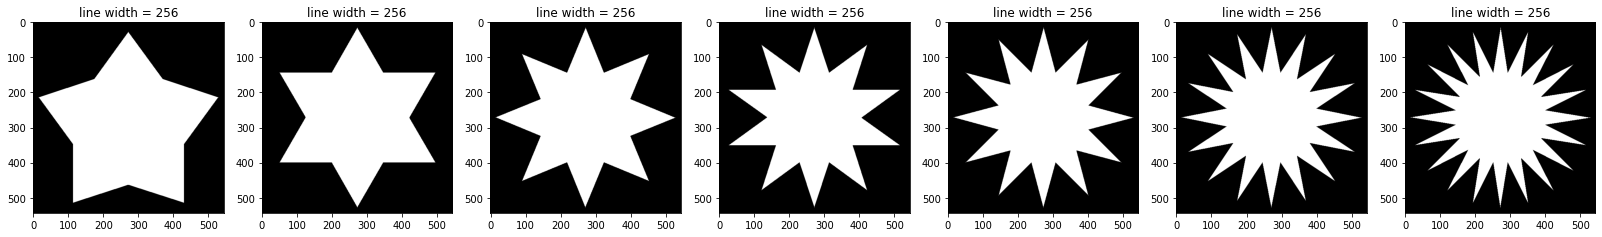

In [8]:
center = np.array([1,1])
folder = "stars1"

plt.figure(figsize=(4*7,4))
for i_n, (n, is_flat_top) in enumerate([
    (5, False), (6, False), (8, False), (10, False), (12, False), (16, False), (20, False)
]):
    rate = 1 / 2 / np.cos(1 / n * np.pi)
    angles = [180 / n * i + (90 / n if is_flat_top else 0) for i in range(n * 2)]
    pts = [center + np.array([
        -np.sin(a/180*np.pi), np.cos(a/180*np.pi)
    ]) * (1 if ia%2==0 else rate) for ia, a in enumerate(angles)]
    # pt0 = np.array([0,1])
    # pt1 = center + np.array([-np.sin(18/180*np.pi), -np.cos(18/180*np.pi)])
    # pt2 = center + np.array([np.sin(54/180*np.pi), -np.cos(54/180*np.pi)])
    # pt3 = center + np.array([np.sin(54/180*np.pi), np.cos(54/180*np.pi)])
    # pt4 = center + np.array([-np.sin(18/180*np.pi), np.cos(18/180*np.pi)])
    vertices = np.array([center] + pts)
    vertices[:,0] -= np.min(vertices[:,0])
    vertices[:,1] -= np.min(vertices[:,1])
    vertices /= np.max(vertices)
    vertices = vertices * 511

    v = np.round(vertices).astype(int)
    pattern = np.zeros((np.max(v[:,0])+1, np.max(v[:,1])+1))
    rr, cc = sk_poly(v[1:,0], v[1:,1], pattern.shape)
    pattern[rr,cc] = 1
    pattern = pattern.T[::-1]
    
    b = [512-pattern.shape[0], 512-pattern.shape[1]]
    b = [b[0]//2, b[0]-b[0]//2, b[1]//2, b[1]-b[1]//2]
    pattern = cv2.copyMakeBorder(pattern,b[0],b[1],b[2],b[3],cv2.BORDER_CONSTANT,value=0)

    plt.subplot(1,7,i_n+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-n{n}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-n{n}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

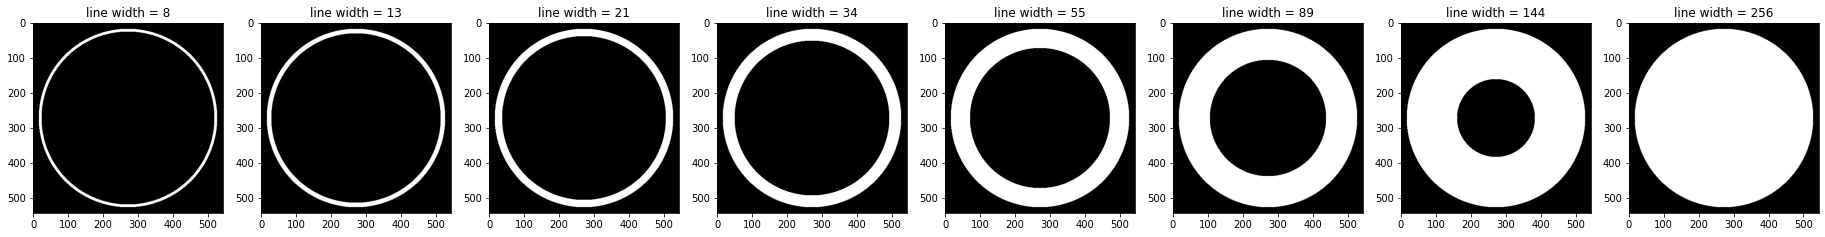

In [9]:
coords = np.array(np.meshgrid(np.arange(512), np.arange(512), indexing="ij")).transpose([1,2,0])
folder = "circles"

ws = np.array(fibo(max_num=192, min_num=8)+[256])
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    dist = np.linalg.norm(coords - np.array([[[255.5, 255.5]]]), axis=2)
    pattern = ((dist<=255.5) * (dist>(255.5-w))).astype(int)
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

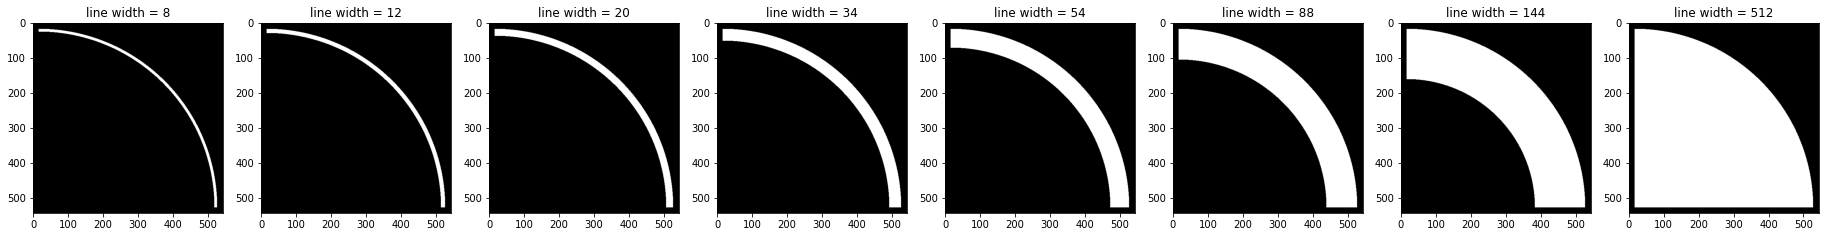

In [10]:
coords = np.array(np.meshgrid(np.arange(1024), np.arange(1024), indexing="ij")).transpose([1,2,0])
folder = "quater_circles"

ws = np.array(fibo(max_num=192, min_num=8)+[512])//2*2
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    dist = np.linalg.norm(coords - np.array([[[511.5, 511.5]]]), axis=2)
    pattern = ((dist<=511.5) * (dist>(511.5-w))).astype(int)
    pattern = pattern[:512,512:]
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

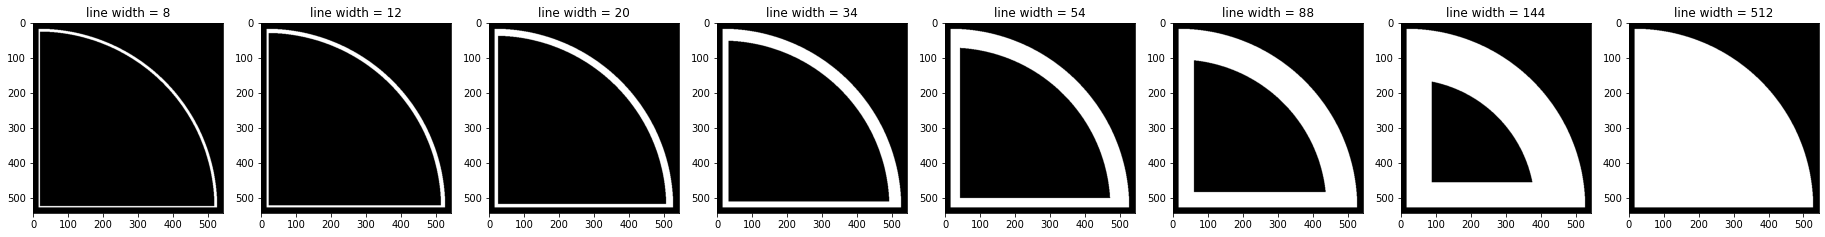

In [11]:
coords = np.array(np.meshgrid(np.arange(1024), np.arange(1024), indexing="ij")).transpose([1,2,0])
folder = "quater_circles_s_half"

ws = np.array(fibo(max_num=192, min_num=8)+[512])//2*2
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    dist = np.linalg.norm(coords - np.array([[[511.5, 511.5]]]), axis=2)
    pattern = ((dist<=511.5) * (dist>(511.5-w))).astype(int)
    pattern = pattern[:512,512:]
    pattern[w//2:,:w//2] = 1
    pattern[-w//2:,:-w//2] = 1
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

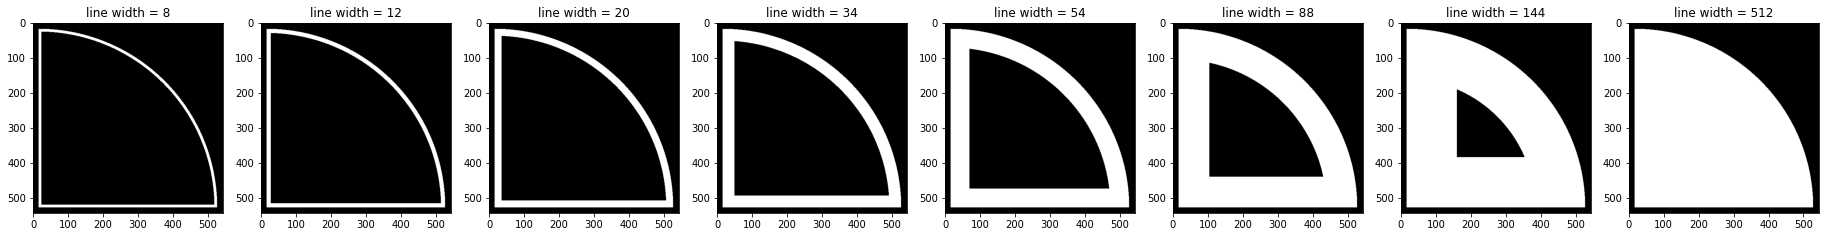

In [12]:
coords = np.array(np.meshgrid(np.arange(1024), np.arange(1024), indexing="ij")).transpose([1,2,0])
folder = "quater_circles_s"

ws = np.array(fibo(max_num=192, min_num=8)+[512])//2*2
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    dist = np.linalg.norm(coords - np.array([[[511.5, 511.5]]]), axis=2)
    pattern = ((dist<=511.5) * (dist>(511.5-w))).astype(int)
    pattern = pattern[:512,512:]
    pattern[w:,:w] = 1
    pattern[-w:,:-w] = 1
    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

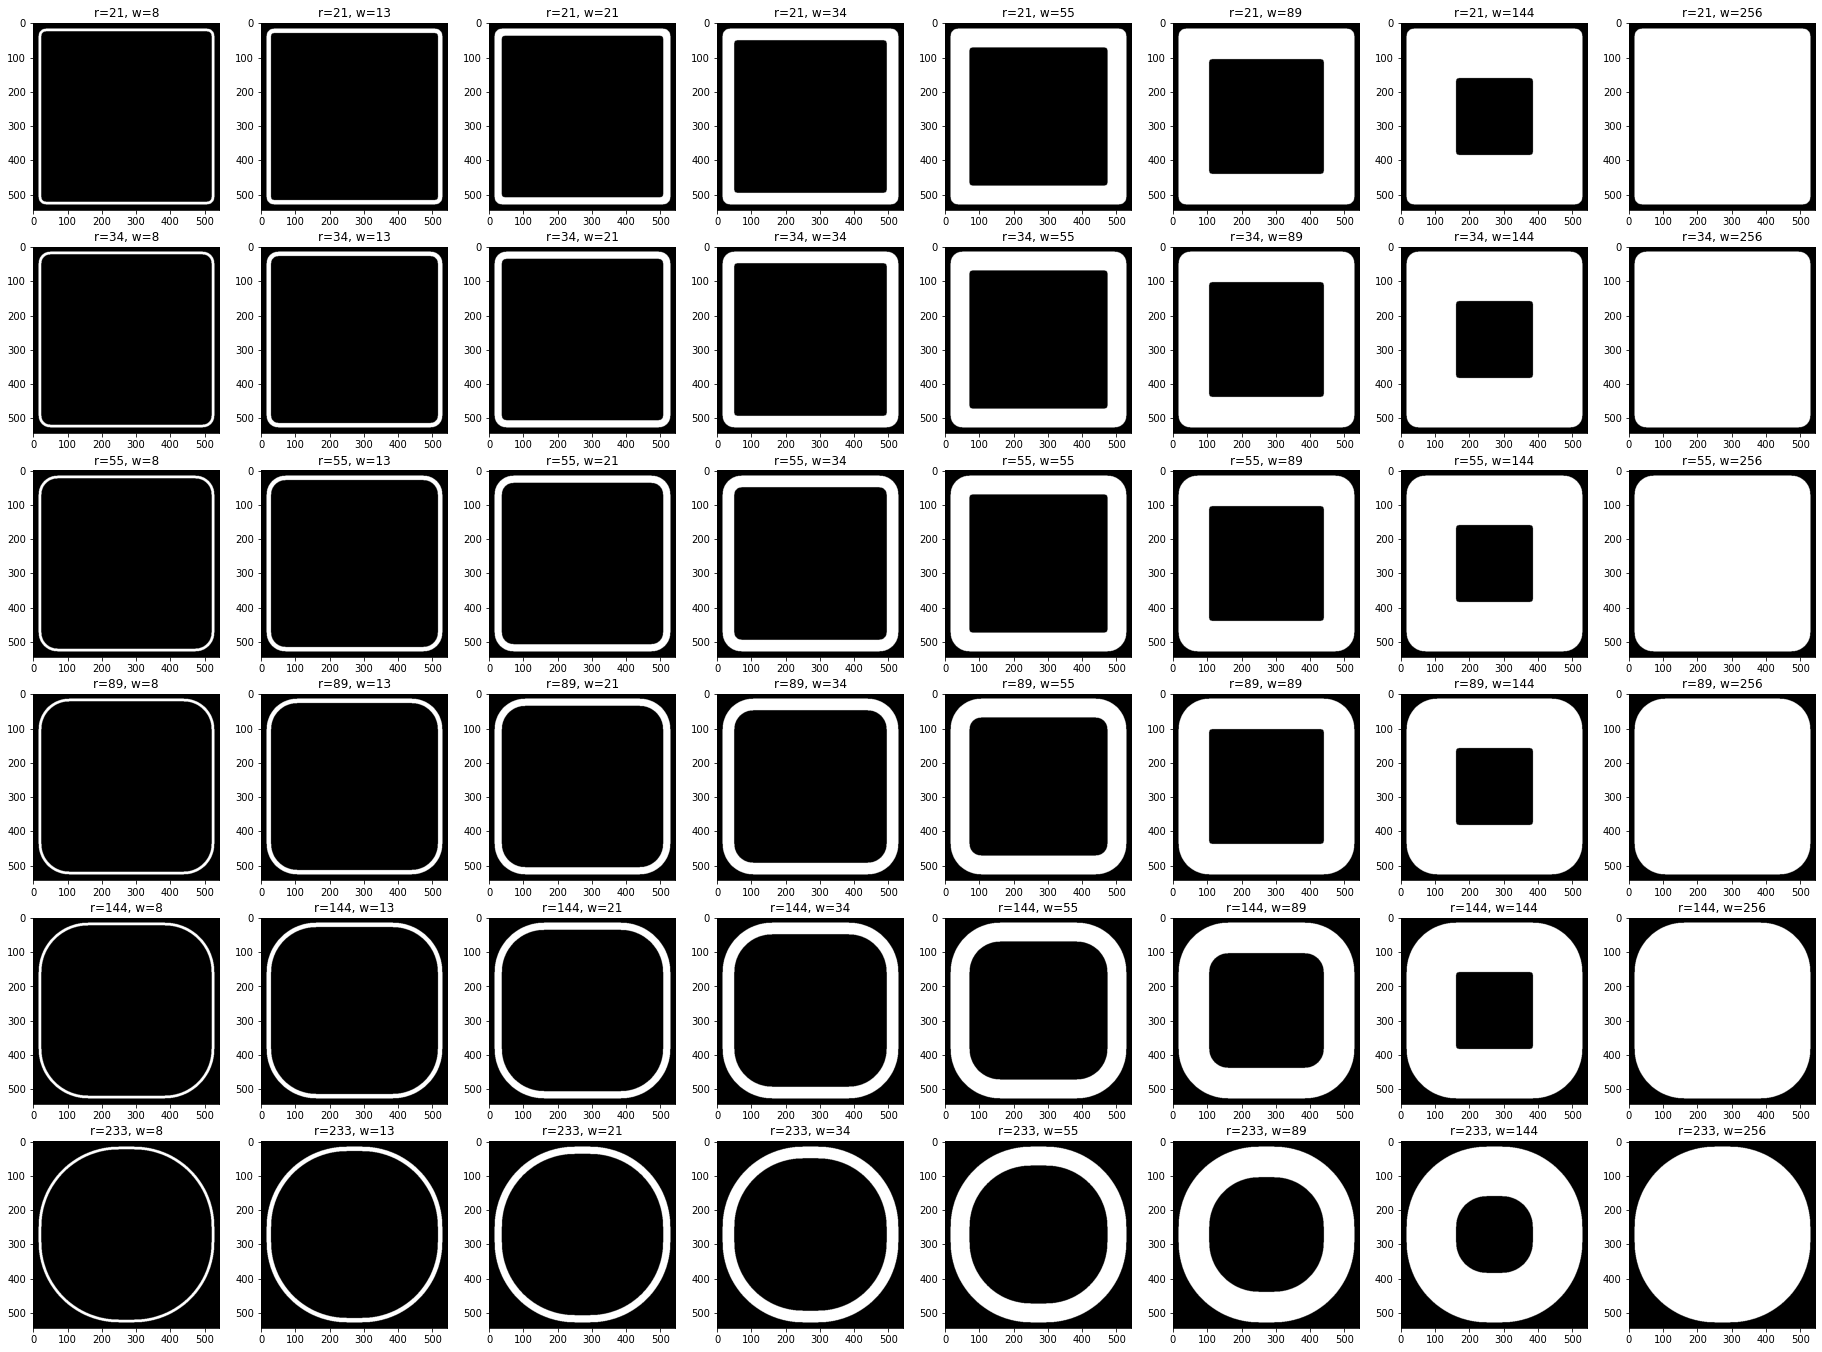

In [13]:
coords = np.array(np.meshgrid(np.arange(512), np.arange(512), indexing="ij")).transpose([1,2,0])
folder = "cornerd_squares"

rs = np.array(fibo(max_num=256, min_num=16))
ws = np.array(fibo(max_num=192, min_num=8)+[256])
plt.figure(figsize=(4*len(ws),4*len(rs)))
for i_r, r in enumerate(rs):
    for i_w, w in enumerate(ws):
        patterns = []
        for jr, r_ in enumerate([r, max(8, r-w)]):
            pattern_ = np.ones([512,512])
            half1 = np.array(np.meshgrid(np.arange(r_), np.arange(r_), indexing="ij")).transpose([1,2,0])
            half1 = (np.linalg.norm(half1 - np.array([[[r_-0.5, r_-0.5]]]), axis=2)<(r_-0.5)).astype(int)
            pattern_[:r_,:r_] = half1
            pattern_[-r_:,:r_] = half1[::-1]
            pattern_[:r_,-r_:] = half1[:,::-1]
            pattern_[-r_:,-r_:] = half1[::-1,::-1]
            if jr==1:
                pattern_ = cv2.copyMakeBorder(pattern_,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
                pattern_ = cv2.erode(pattern_, np.ones((3,3),np.uint8), iterations = w)[1:-1,1:-1]
            patterns.append(pattern_)
        pattern = patterns[0] - patterns[1]
        
        plt.subplot(len(rs),len(ws),i_r*len(ws)+i_w+1)
        plt.gca().set_title(f"r={r}, w={w}")
        plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
        os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
        cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-r{r}-w{w}.png', np.array([
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
        ]).transpose([1,2,0]))
        cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-r{r}-w{w}.png', np.array([
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
        ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

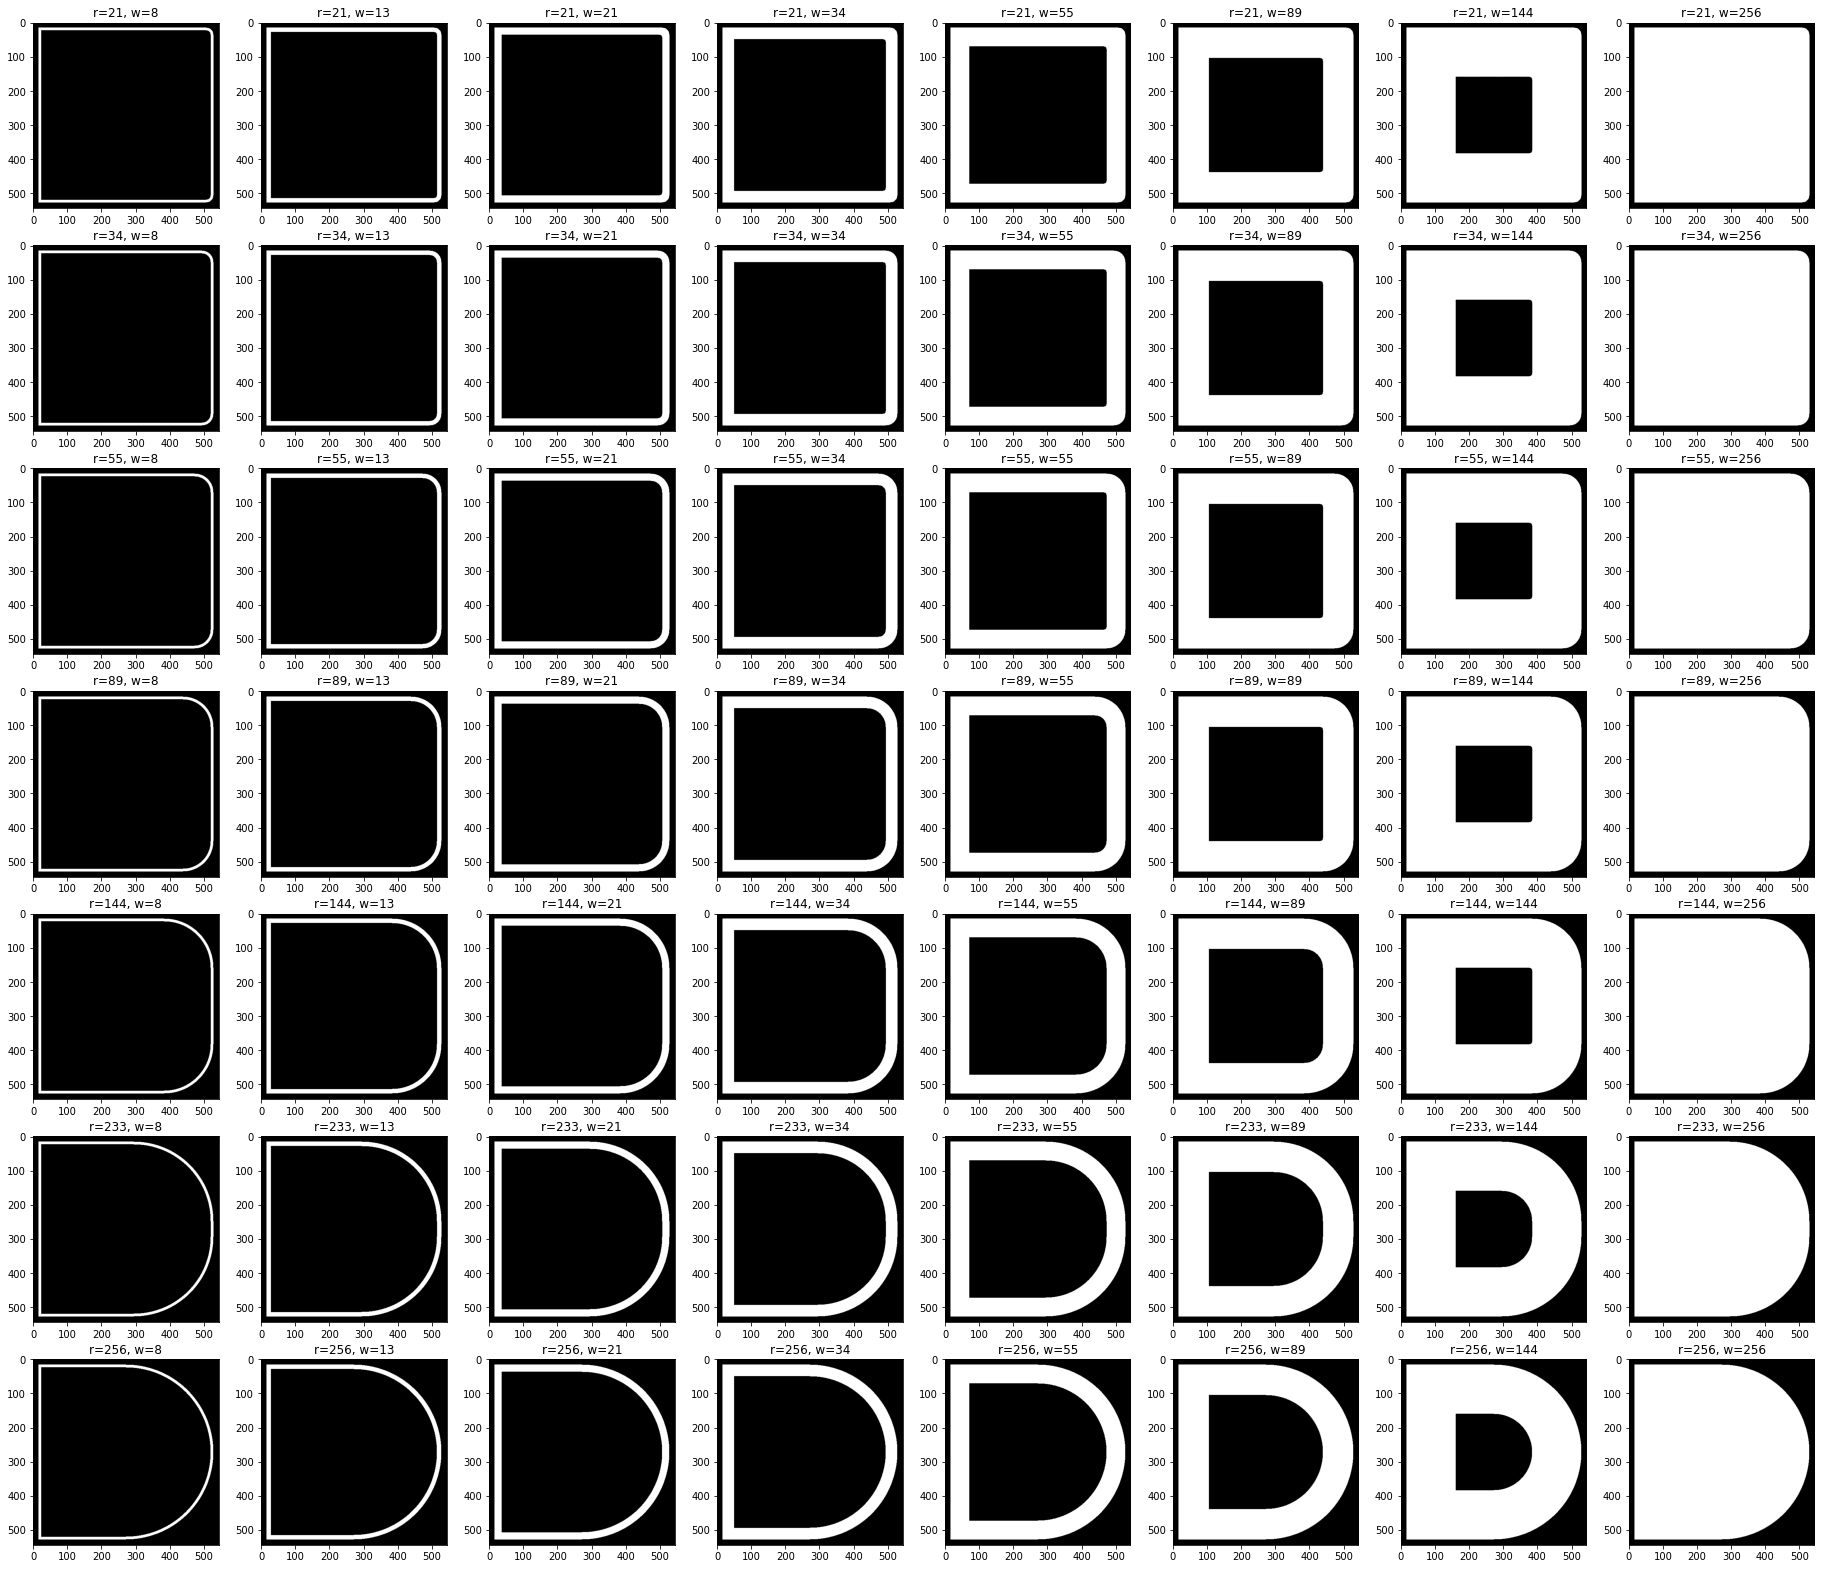

In [14]:
coords = np.array(np.meshgrid(np.arange(512), np.arange(512), indexing="ij")).transpose([1,2,0])
folder = "cornerd_squares_half"

rs = np.array(fibo(max_num=256, min_num=16)+[256])
ws = np.array(fibo(max_num=192, min_num=8)+[256])
plt.figure(figsize=(4*len(ws),4*len(rs)))
for i_r, r in enumerate(rs):
    for i_w, w in enumerate(ws):
        patterns = []
        for jr, r_ in enumerate([r, max(8, r-w)]):
            pattern_ = np.ones([512,512])
            half1 = np.array(np.meshgrid(np.arange(r_), np.arange(r_), indexing="ij")).transpose([1,2,0])
            half1 = (np.linalg.norm(half1 - np.array([[[r_-0.5, r_-0.5]]]), axis=2)<(r_-0.5)).astype(int)
            pattern_[:r_,:r_] = half1
            pattern_[-r_:,:r_] = half1[::-1]
            pattern_[:r_,-r_:] = half1[:,::-1]
            pattern_[-r_:,-r_:] = half1[::-1,::-1]
            if jr==1:
                pattern_ = cv2.copyMakeBorder(pattern_,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
                pattern_ = cv2.erode(pattern_, np.ones((3,3),np.uint8), iterations = w)[1:-1,1:-1]
            patterns.append(pattern_)
        pattern = patterns[0] - patterns[1]
        square = np.zeros([512,512])
        square[:w] = 1
        square[-w:] = 1
        square[:,:w] = 1
        square[:,-w:] = 1
        pattern[:,:256] = square[:,:256]
        
        plt.subplot(len(rs),len(ws),i_r*len(ws)+i_w+1)
        plt.gca().set_title(f"r={r}, w={w}")
        plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
        os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
        cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-r{r}-w{w}.png', np.array([
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
        ]).transpose([1,2,0]))
        cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-r{r}-w{w}.png', np.array([
            (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
        ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()

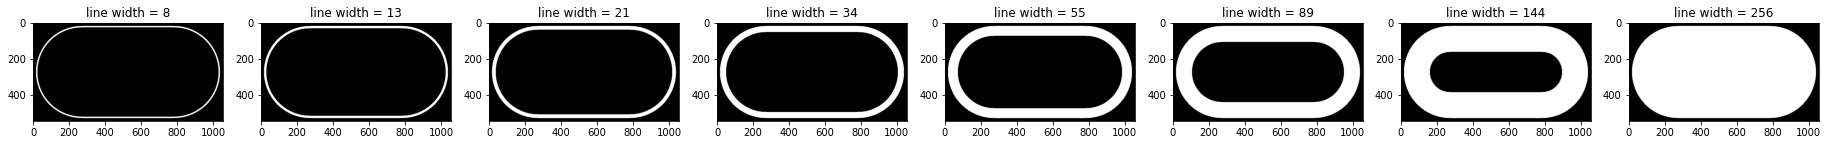

In [15]:
coords = np.array(np.meshgrid(np.arange(512), np.arange(512), indexing="ij")).transpose([1,2,0])
folder = "rounded_button"

r = 256
plt.figure(figsize=(4*len(ws),4))
for i_w, w in enumerate(ws):
    patterns = []
    for jr, r_ in enumerate([r, max(8, r-w)]):
        pattern_ = np.ones([512,512])
        half1 = np.array(np.meshgrid(np.arange(r_), np.arange(r_), indexing="ij")).transpose([1,2,0])
        half1 = (np.linalg.norm(half1 - np.array([[[r_-0.5, r_-0.5]]]), axis=2)<(r_-0.5)).astype(int)
        pattern_[:r_,:r_] = half1
        pattern_[-r_:,:r_] = half1[::-1]
        pattern_[:r_,-r_:] = half1[:,::-1]
        pattern_[-r_:,-r_:] = half1[::-1,::-1]
        if jr==1:
            pattern_ = cv2.copyMakeBorder(pattern_,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
            pattern_ = cv2.erode(pattern_, np.ones((3,3),np.uint8), iterations = w)[1:-1,1:-1]
        patterns.append(pattern_)
    pattern = patterns[0] - patterns[1]
    square = np.zeros([512,512])
    square[:w] = 1
    square[-w:] = 1
    pattern[:,:256] = square[:,:256]
    pattern = np.concatenate([pattern[:,::-1], pattern], axis=1)

    plt.subplot(1,len(ws),i_w+1)
    plt.gca().set_title(f"line width = {w}")
    plt.imshow(cv2.copyMakeBorder(pattern,16,16,16,16,cv2.BORDER_CONSTANT,value=0), cmap="gray")
    
    os.makedirs(f'./source_pngs/{folder}', exist_ok=True)
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-trans-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8),
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))
    cv2.imwrite(f'./source_pngs/{folder}/{folder}-bg-w{w}.png', np.array([
        (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8), (pattern * 255).astype(np.uint8)
    ]).transpose([1,2,0]))

plt.savefig(f'./demo/{folder}.png')
plt.show()